Joshua Patrick G. Chiu
<br>
datasetlink: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

### DATA EXPLORATION

  existing_account  duration_month credit_history purpose  credit_amount  \
0              A11               6            A34     A43           1169   
1              A12              48            A32     A43           5951   
2              A14              12            A34     A46           2096   
3              A11              42            A32     A42           7882   
4              A11              24            A33     A40           4870   

  savings_account employment_status  installment_rate personal_status_sex  \
0             A65               A75                 4                 A93   
1             A61               A73                 2                 A92   
2             A61               A74                 2                 A93   
3             A61               A74                 2                 A93   
4             A61               A73                 3                 A93   

  other_debtors  ...  property age  other_installment_plans housing  \
0        

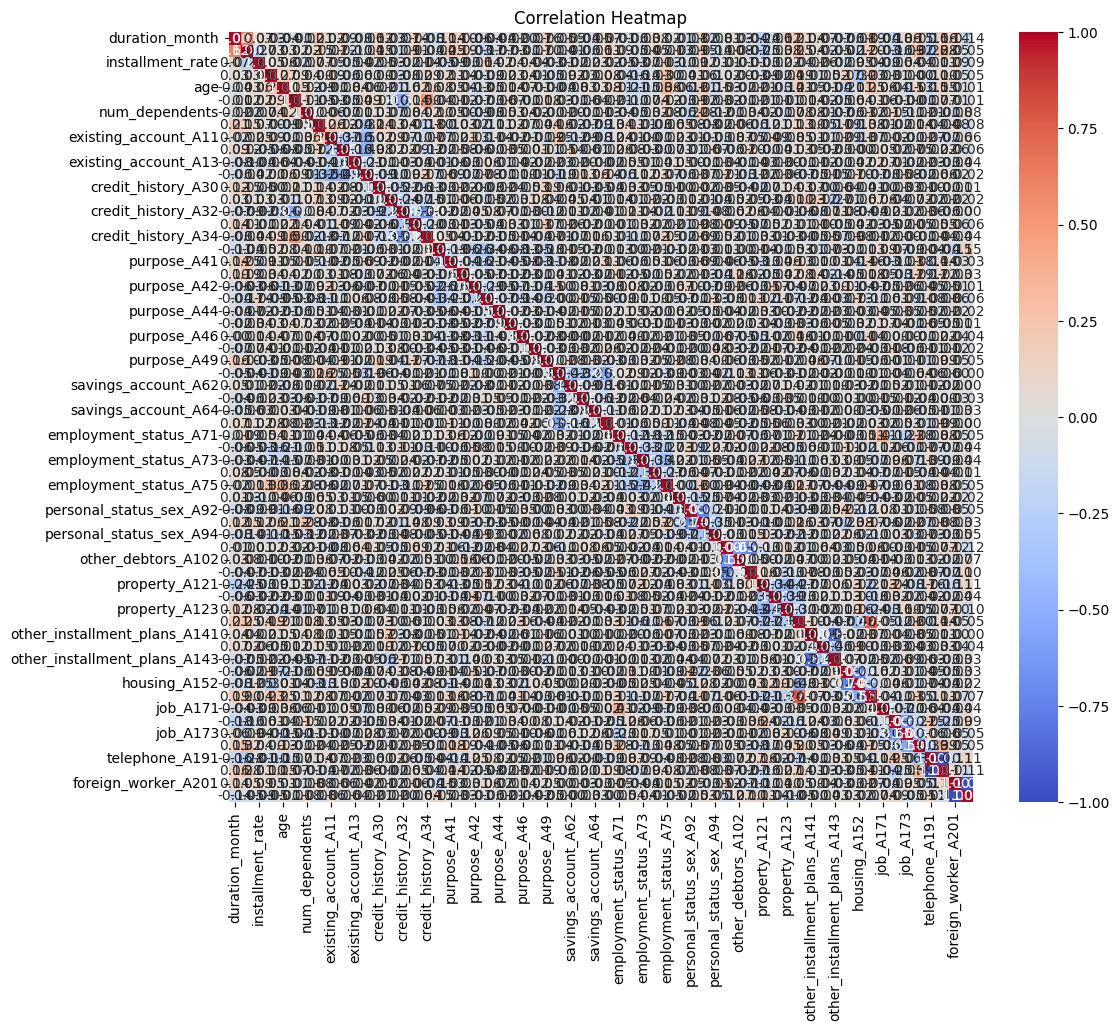

Top 5 correlated features with the target:
existing_account_A14    0.322436
existing_account_A11    0.258333
duration_month          0.214927
credit_history_A34      0.181713
savings_account_A61     0.161007
Name: credit_risk, dtype: float64


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ["existing_account", "duration_month", "credit_history", "purpose", 
                "credit_amount", "savings_account", "employment_status", "installment_rate",
                "personal_status_sex", "other_debtors", "present_residence", "property",
                "age", "other_installment_plans", "housing", "existing_credits",
                "job", "num_dependents", "telephone", "foreign_worker", "credit_risk"]

data = pd.read_csv(url, sep=' ', names=column_names, header=None)

# Display the first few rows of the dataset
print(data.head())

# Replace '?' with NaN and drop rows with missing values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Compute the correlation matrix
corr = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Identify top correlated features with the target variable
target_corr = corr['credit_risk'].abs().sort_values(ascending=False)
top_5_correlated = target_corr[1:6]  # Exclude the target variable itself
print("Top 5 correlated features with the target:")
print(top_5_correlated)


### TRAIN | TEST SPLIT

### TRAIN | TEST SPLIT

### FINAL MODEL EVALUATION